In [62]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [63]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [64]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [65]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [66]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [67]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 39 of Set 12 | albany
Processing Record 40 of Set 12 | hobart
Processing Record 41 of Set 12 | qaanaaq
Processing Record 42 of Set 12 | georgetown
Processing Record 43 of Set 12 | barrow
Processing Record 44 of Set 12 | vaini
Processing Record 45 of Set 12 | souillac
Processing Record 46 of Set 12 | port hardy
Processing Record 47 of Set 12 | forbes
Processing Record 48 of Set 12 | araceli
Processing Record 49 of Set 12 | castro
Processing Record 50 of Set 12 | aswan
Processing Record 51 of Set 12 | linxia
Processing Record 52 of Set 12 | suntar
Processing Record 53 of Set 12 | oktyabrskoye
Processing Record 54 of Set 12 | faanui
Processing Record 55 of Set 12 | mys shmidta
City not found. Skipping...
Processing Record 56 of Set 12 | cape town
Processing Record 57 of Set 12 | san patricio
Processing Record 58 of Set 12 | jalu
Processing Record 59 of Set 12 | kahului
Processing Record 60 of Set 12 | tsihombe
C

Processing Record 31 of Set 15 | santa isabel
Processing Record 32 of Set 15 | dikson
Processing Record 33 of Set 15 | sebastian
Processing Record 34 of Set 15 | hithadhoo
Processing Record 35 of Set 15 | changli
Processing Record 36 of Set 15 | zhob
Processing Record 37 of Set 15 | egvekinot
Processing Record 38 of Set 15 | kavaratti
Processing Record 39 of Set 15 | monywa
Processing Record 40 of Set 15 | saint george
Processing Record 41 of Set 15 | colchester
Processing Record 42 of Set 15 | tabiauea
City not found. Skipping...
Processing Record 43 of Set 15 | bethel
Processing Record 44 of Set 15 | san antonio
Processing Record 45 of Set 15 | totness
Processing Record 46 of Set 15 | tidore
City not found. Skipping...
Processing Record 47 of Set 15 | grover beach
Processing Record 48 of Set 15 | iracoubo
Processing Record 49 of Set 15 | salalah
Processing Record 50 of Set 15 | vila franca do campo
Processing Record 1 of Set 16 | port elizabeth
Processing Record 2 of Set 16 | awbari


Processing Record 20 of Set 19 | constitucion
Processing Record 21 of Set 19 | belushya guba
City not found. Skipping...
Processing Record 22 of Set 19 | kanel
Processing Record 23 of Set 19 | alotau
City not found. Skipping...
Processing Record 24 of Set 19 | hervey bay
Processing Record 25 of Set 19 | opuwo
Processing Record 26 of Set 19 | lagoa
Processing Record 27 of Set 19 | wanning
Processing Record 28 of Set 19 | la union
Processing Record 29 of Set 19 | qaqortoq
Processing Record 30 of Set 19 | sikonge
Processing Record 31 of Set 19 | sarkand
Processing Record 32 of Set 19 | anadyr
Processing Record 33 of Set 19 | sao felix do xingu
Processing Record 34 of Set 19 | timizart
Processing Record 35 of Set 19 | helong
Processing Record 36 of Set 19 | luderitz
Processing Record 37 of Set 19 | pudozh
Processing Record 38 of Set 19 | hochst
Processing Record 39 of Set 19 | pandan
Processing Record 40 of Set 19 | olafsvik
Processing Record 41 of Set 19 | ilulissat
Processing Record 42 o

Processing Record 8 of Set 23 | coromandel
Processing Record 9 of Set 23 | sinegorye
Processing Record 10 of Set 23 | caala
Processing Record 11 of Set 23 | intipuca
Processing Record 12 of Set 23 | boli
Processing Record 13 of Set 23 | ludwigslust
Processing Record 14 of Set 23 | biltine
Processing Record 15 of Set 23 | whittlesea
Processing Record 16 of Set 23 | cooma
Processing Record 17 of Set 23 | verkhoyansk
Processing Record 18 of Set 23 | miles city
Processing Record 19 of Set 23 | parana
Processing Record 20 of Set 23 | mount gambier
Processing Record 21 of Set 23 | vostok
Processing Record 22 of Set 23 | mirnyy
Processing Record 23 of Set 23 | tay ninh
Processing Record 24 of Set 23 | nantucket
Processing Record 25 of Set 23 | kaihua
Processing Record 26 of Set 23 | impfondo
Processing Record 27 of Set 23 | graaff-reinet
Processing Record 28 of Set 23 | oranjemund
Processing Record 29 of Set 23 | roma
Processing Record 30 of Set 23 | half moon bay
Processing Record 31 of Set 

In [72]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,88.43,47,93,5.91,US,2022-08-01 18:41:40
1,Hobart,-42.8794,147.3294,46.26,79,24,19.57,AU,2022-08-01 18:40:44
2,Qaanaaq,77.4840,-69.3632,48.06,57,35,1.23,GL,2022-08-01 18:41:42
3,Georgetown,5.4112,100.3354,82.33,91,20,4.61,MY,2022-08-01 18:41:14
4,Barrow,71.2906,-156.7887,41.05,73,17,12.26,US,2022-08-01 18:41:43
5,Vaini,-21.2000,-175.2000,73.56,100,40,0.00,TO,2022-08-01 18:41:35
6,Souillac,-20.5167,57.5167,66.58,100,75,3.44,MU,2022-08-01 18:41:44
7,Port Hardy,50.6996,-127.4199,62.78,72,75,16.11,CA,2022-08-01 18:41:45
8,Forbes,-33.3833,148.0167,37.92,86,0,2.71,AU,2022-08-01 18:41:46
9,Araceli,10.5529,119.9913,80.56,81,100,4.76,PH,2022-08-01 18:41:54


In [69]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-08-01 18:41:40,42.6001,-73.9662,88.43,47,93,5.91
1,Hobart,AU,2022-08-01 18:40:44,-42.8794,147.3294,46.26,79,24,19.57
2,Qaanaaq,GL,2022-08-01 18:41:42,77.4840,-69.3632,48.06,57,35,1.23
3,Georgetown,MY,2022-08-01 18:41:14,5.4112,100.3354,82.33,91,20,4.61
4,Barrow,US,2022-08-01 18:41:43,71.2906,-156.7887,41.05,73,17,12.26
...,...,...,...,...,...,...,...,...,...
575,Severomuysk,RU,2022-08-01 19:04:51,56.1481,113.4267,48.42,93,20,2.86
576,Koslan,RU,2022-08-01 19:04:52,63.4564,48.8989,56.98,90,2,3.65
577,Dutse,NG,2022-08-01 19:04:53,11.7594,9.3392,81.39,62,84,12.15
578,Saint-Francois,FR,2022-08-01 19:04:53,46.4154,3.9054,80.04,44,0,6.91


In [73]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [77]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

0      42.6001
1     -42.8794
2      77.4840
3       5.4112
4      71.2906
        ...   
575    56.1481
576    63.4564
577    11.7594
578    46.4154
579   -28.8667
Name: Lat, Length: 580, dtype: float64

In [75]:
# Get today's date in seconds.
today = time.time()
today = time.strftime("%x")
today

'08/01/22'

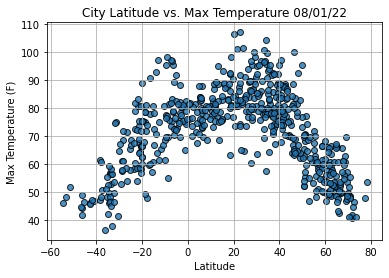

In [78]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

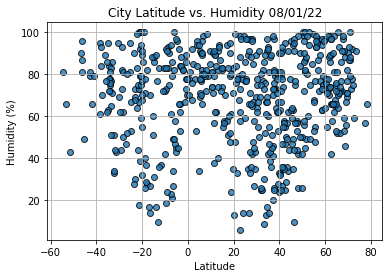

In [81]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

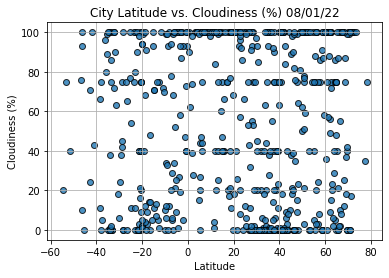

In [82]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

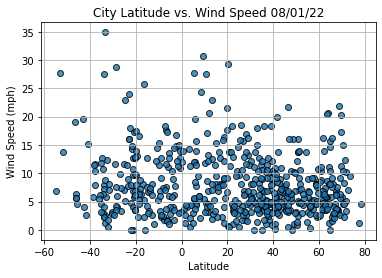

In [83]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [92]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

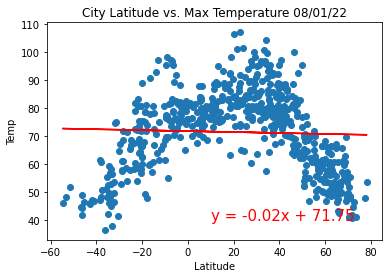

In [94]:
plot_linear_regression(lats,max_temps,f"City Latitude vs. Max Temperature "+ time.strftime("%x"), "Temp", (10,40))

In [96]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

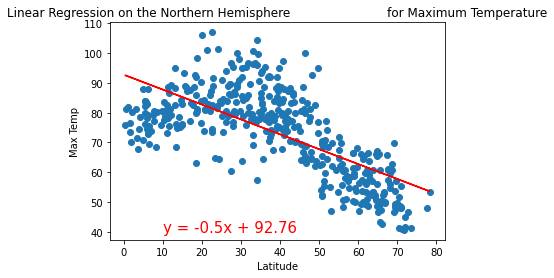

In [97]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

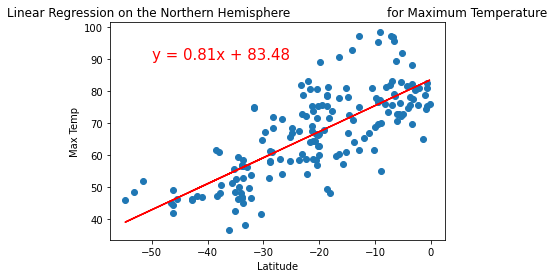

In [99]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

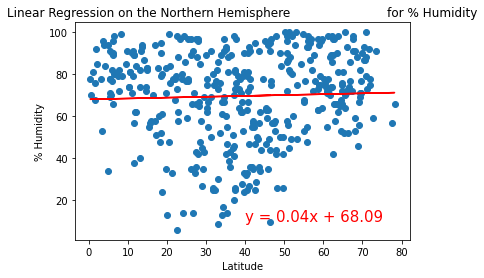

In [100]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

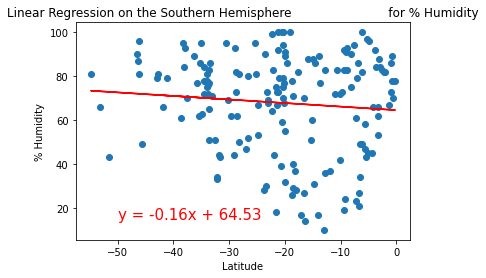

In [101]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

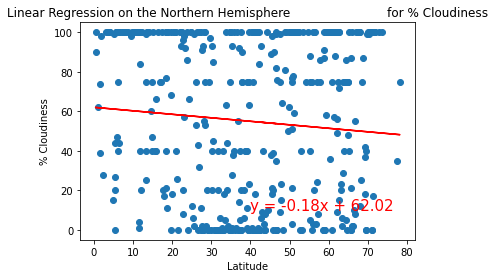

In [102]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

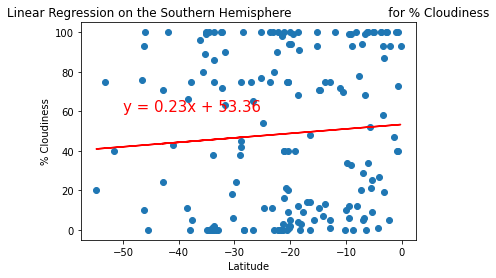

In [104]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

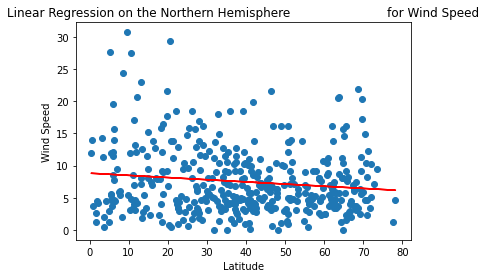

In [105]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))